# Proyecto parte 1

### Importación de libreria

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns

### Importación de base de datos

In [3]:
df=pd.read_csv('WineQuality_Red.csv')

In [4]:
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [5]:
df.shape

(1599, 12)

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

¿Qué tipos de variables contiene el dataframe?

R: el dataframe "df" contiene variables cuantitativa continua y discreta.

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


¿Se puede calcular la moda para variables numéricas?

 R: Si, esto se puede hacer revisando el valor con mayor frecuencia.

### Graficos 

In [31]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [49]:
df_new=df.groupby(['quality']).size().reset_index(name='counts')
df_new

,quality,counts
0,3,10
1,4,53
2,5,681
3,6,638
4,7,199
5,8,18


<AxesSubplot:xlabel='quality', ylabel='counts'>

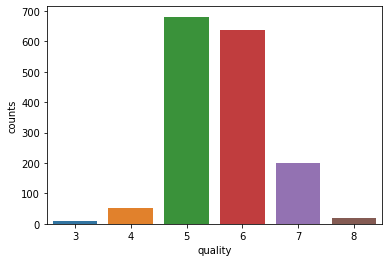

In [22]:
sns.barplot(x=df_new.quality,y=df_new.counts)

En este diagrama de barra notamos que la mayoria de los votantes eligieron una calificación de 5 y 6. Por lo cual nos da entender que es un vino regular.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

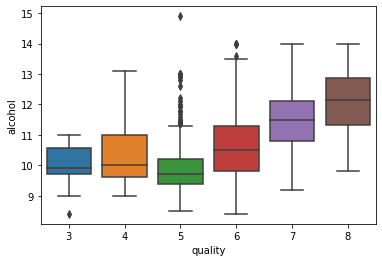

In [15]:
sns.boxplot(x=df.quality,y=df.alcohol)

En el anterior grafico de caja y bigote podemos observar que a medida aumenta la concentracion de alcohol mejora la puntuación del vino. Por lo tanto puede ser una variable de gran importancia.

<AxesSubplot:xlabel='density', ylabel='fixed acidity'>

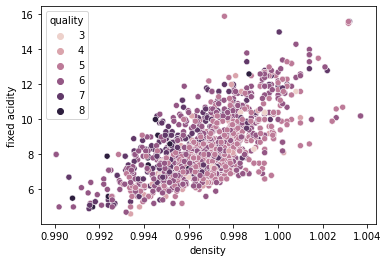

In [30]:
sns.scatterplot(x=df['density'],y=df['fixed acidity'],hue=df['quality'])

Observamos que las calificaciones bajas tiende a tener una mayor densidad y una menor acides fijada.

<AxesSubplot:xlabel='pH', ylabel='Count'>

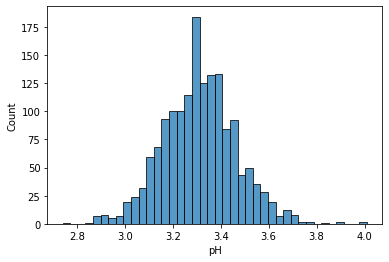

In [84]:
sns.histplot(df.pH)

Notemos por medio de esté histograma que el pH sigue una distribución normal

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

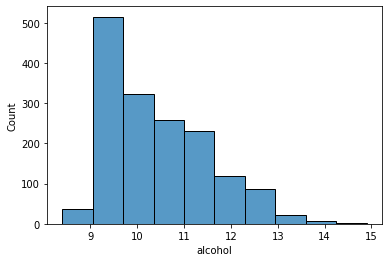

In [69]:
sns.histplot(df.alcohol,bins=10)

Se observa que en la mayor concentración de alcohol esta entre 9 y 11.5

# Proyecto parte 2

### Importación de libreria

In [70]:
from scipy.stats import shapiro
from scipy.stats import norm
import scipy.stats

<AxesSubplot:xlabel='pH', ylabel='Count'>

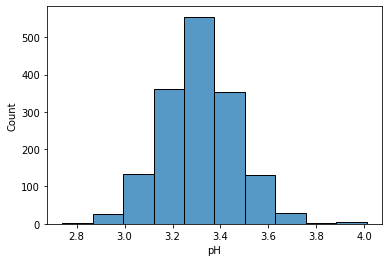

In [82]:
sns.histplot(df['pH'], bins=10)

### Paso 1

Supongamos que son validos los siguientes supuestos:

*   Son independientes: Ok
*   Idénticamente distribuidas: Ok

Se establecen las hipótesis:

*   H0  : La variable pH proviene de una distribución normal.
*   Ha  : La variable pH no proviene de una distribución normal.

Ahora el test Shapiro-Wilks intenta rechazar la hipotesis nula al nivel de significanza 0.05.

In [75]:
stat, p = shapiro(df.pH)
print('stat=%.3f, p=%.6f' % (stat, p))

stat=0.993, p=0.000002


Al realizar el análisis estadístico, obtuvimos un valor de prueba de 0.993 y un valor de p de 0.000002. Dado que el valor de p es menor que el nivel de significancia de 0.05, podemos rechazar la hipótesis nula y aceptar la hipótesis alternativa. En este caso, la hipótesis alternativa indica que la variable pH no sigue una distribución normal.

<AxesSubplot:xlabel='pH', ylabel='Count'>

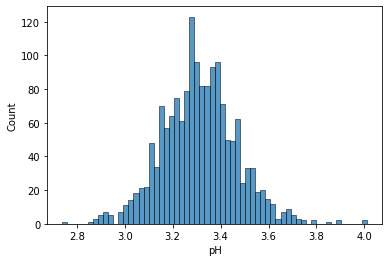

In [85]:
sns.histplot(df['pH'], bins=60)

Podemos considerar un bins=60 como muestra el histograma anterior. por lo tanto se observa que los datos intenta seguir la distribución normal pero en el test de normalidad de Shapiro-Wilks no es suficiente.

### Paso 2

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

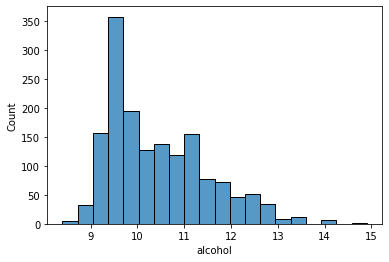

In [86]:
sns.histplot(df.alcohol,bins=20)

Estandarizaremos la variable alcohol.

In [88]:
media=df.alcohol.mean()
sd=df.alcohol.std()
df['alcohol_estandar']=(df.alcohol-media)/sd

In [89]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_estandar
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.584594
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.584594
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,-0.584594
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946


### Paso 3

Vamos a obtener la probabilidad de tener un nivel de alcohol menor a 10.

In [97]:
scipy.stats.norm.cdf((10-media)/sd)
print(round(probabilidad,4)) 
print(1-round(probabilidad,4))    

0.3457
0.6543


*  El valor de 0.3457 nos dice que la probabilidad de tener el nivel de alcohol menor a 10 es de 34.57%

*  Podemos decir que la probabilidad de tener el nivel de alcohol mayor a 10 es de 65.43%

# Proyecto parte 3

In [105]:
from sklearn import linear_model                       # Modelo
from sklearn.model_selection import train_test_split   # Evaluación
from sklearn import metrics                            # Métricas

In [112]:
var = df['alcohol']
calf = df['quality']

x = np.array(var).reshape(-1, 1)
y = np.array(calf)

# Separando la base en Train and Test
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20, random_state=0)

In [113]:
# Ajustar un modelo de regresión lineal a la Muestra de Entrenamiento
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(xtrain, ytrain)

# Prediciendo los precios...
pred = lr.predict(xtest)

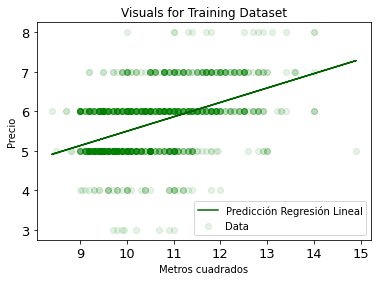

In [114]:
# Visualizando los Resultados de Entrenamiento
mtp.scatter( xtrain, ytrain, color= 'green', label="Data", alpha=.1)
mtp.plot(xtrain, lr.predict(xtrain), color = 'darkgreen', label="Predicción Regresión Lineal")
mtp.title ("Visuals for Training Dataset")
mtp.xlabel("Metros cuadrados")
mtp.ylabel("Precio")

mtp.xticks(fontsize=13)
mtp.yticks(fontsize=13)

mtp.legend()

mtp.show()

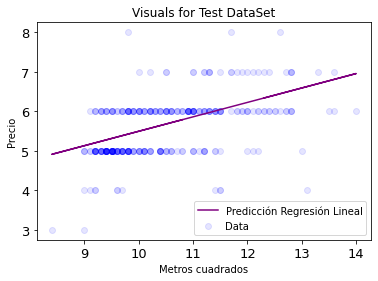

In [115]:
# Visualizando los Resultados de Validación
mtp.scatter(xtest, ytest, color= 'blue', label="Data", alpha=.1)
mtp.plot(xtest, lr.predict(xtest), color = 'purple', label="Predicción Regresión Lineal")
mtp.title("Visuals for Test DataSet")
mtp.xlabel("Metros cuadrados")
mtp.ylabel("Precio")

mtp.xticks(fontsize=13)
mtp.yticks(fontsize=13)

mtp.legend()

mtp.show()

In [116]:
print('Intercepto Bo: {:0.3f}'.format(lr.intercept_))
print('Coefficiente B1: {}'.format(lr.coef_))

Intercepto Bo: 1.846
Coefficiente B1: [0.36494637]


In [117]:
pred = lr.predict(xtrain)

rmse = float(format(np.sqrt(metrics.mean_squared_error(ytrain,pred)),'.3f'))

print('Root Mean Squared Error Train (RMSE): {}'.format(rmse))

Root Mean Squared Error Train (RMSE): 0.722


In [118]:
pred = lr.predict(xtest)

rmse = float(format(np.sqrt(metrics.mean_squared_error(ytest,pred)),'.3f'))

print('Root Mean Squared Error Test (RMSE): {}'.format(rmse))

Root Mean Squared Error Test (RMSE): 0.661


In [119]:
rtrsm = float(format(lr.score(xtrain, ytrain),'.3f'))
rtesm = float(format(lr.score(xtest, ytest),'.3f'))

print('R-Squared (training): {}'.format(rtrsm))
print('R-Squared (test): {}'.format(rtesm))

R-Squared (training): 0.223
R-Squared (test): 0.238


Podemos concluir a partir del modelo que por cada aumento en la concentración de alcohol, la calificación del vino aumenta en 0.36. Sin embargo, es importante señalar que el modelo no parece tener una capacidad predictiva muy fuerte, dado que su coeficiente de determinación R-cuadrado es de solo 0.238.